In [10]:
json_name = 'data.json'
pkl_name = 'casos.pkl'
csv_name = 'casos.csv'
carpeta = ''
pkl_name_ll = 'llibres.pkl'
csv_name_ll = 'llibres.csv'

In [11]:
import requests
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# np seed = 0
np.random.seed(0)

In [12]:
# URL del archivo JSON comprimido
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/goodreads/goodreads_books.json.gz'

# Realizar la solicitud GET al servidor
response = requests.get(url, stream=True)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Descomprimir el contenido del archivo
    with gzip.GzipFile(fileobj=response.raw) as f:
        # Leer las primeras 500 filas del JSON
        primeras_500_filas = [json.loads(next(f)[:-1].decode('utf-8')) for _ in range(500)]

    print("JSON creat.")
else:
    print(f"Error al descargar el archivo. Código de estado: {response.status_code}")

JSON creat.


In [13]:
pd.set_option('display.max_columns', None)
df = pd.DataFrame(primeras_500_filas)

In [14]:
df

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,[],,Paperback,https://www.goodreads.com/book/show/5333265-w-...,"[{'author_id': '604031', 'role': ''}]",St. Martin's Press,256,1,9780312853129,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,"[8709549, 17074050, 28937, 158816, 228563, 112...","Anita Diamant's international bestseller ""The ...",Audio CD,https://www.goodreads.com/book/show/1333909.Go...,"[{'author_id': '626222', 'role': ''}]",Simon & Schuster Audio,,1,9780743509985,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,"[19997, 828466, 1569323, 425389, 1176674, 2627...",Omnibus book club edition containing the Ladie...,Hardcover,https://www.goodreads.com/book/show/7327624-th...,"[{'author_id': '10333', 'role': ''}]","Nelson Doubleday, Inc.",600,,,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,"[6604176, 6054190, 2285777, 82641, 7569453, 70...",Addie Downs and Valerie Adler were eight when ...,Hardcover,https://www.goodreads.com/book/show/6066819-be...,"[{'author_id': '9212', 'role': ''}]",Atria Books,368,14,9780743294294,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,[],,,https://www.goodreads.com/book/show/287140.Run...,"[{'author_id': '149918', 'role': ''}]",,,,9780850308716,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,,1,[],US,por,"[{'count': '1469', 'name': 'to-read'}, {'count...",,false,4.29,,"[13002119, 7726437, 15096911, 15770290, 181768...","Por quinze anos, Colleen Carroll Campbell empr...",Paperback,https://www.goodreads.com/book/show/34443445-m...,"[{'author_id': '3310808', 'role': ''}]",Quadrante,288,,9788574652627,2,,2017,https://www.goodreads.com/book/show/34443445-m...,https://images.gr-assets.com/books/1489617175m...,34443445,1,18538869,"Minhas Irmãs, as Santas: memórias espirituais","Minhas Irmãs, as Santas: memórias espirituais"
496,,13,[],US,spa,"[{'count': '434', 'name': 'to-read'}, {'count'...",,false,3.89,B007VDWD2C,"[2799237, 8688114, 10739545, 3413113, 130971, ...",Siguiendo una costumbre sarda cuyos origenes s...,Paperback,https://www.goodreads.com/book/show/12158822-l...,"[{'author_id': '2966342', 'role': ''}]",Salamandra,188,,9788498383775,5,,2011,https://www.goodreads.com/book/show/12158822-l...,https://images.gr-assets.com/books/1364828503m...,12158822,75,7155273,La acabadora,La acabadora
497,,1,[],US,,"[{'count': '2', 'name': 'to-read'}]",,false,3.67,,[],,,https://www.goodreads.com/book/show/2864845

In [26]:
import pandas as pd
df = pd.read_pickle("llibres.pkl")

In [29]:
# Mostrar todas las columnas del dataframe
df.vector[0].shape

(2,)

In [13]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [9]:
def scale(vector, min_ant = 0, max_ant = 5, min_nou = 0, max_nou = 1):
    """
    Passar de una valoracio [0-5] a una puntuació [-1-1]
    """
    if isinstance(vector, int):
        vector = np.array([vector])
    if vector.shape[0] > 1:
        min_ant = min(vector)
        #max_ant = max(vector)
    escalador = MinMaxScaler(feature_range=(min_nou, max_nou))
    escalador.fit([[min_ant], [max_ant]])
    return escalador.transform(vector.reshape(-1, 1)).flatten()

In [39]:
df = pd.read_pickle("llibres.pkl")

In [40]:
# Eliminar columna vector de df
df = df.drop(columns=['vector'])
df.to_pickle("llibres.pkl")
df.to_csv("llibres.csv")

In [44]:
# Import sns
import seaborn as sns
import matplotlib.pyplot as plt

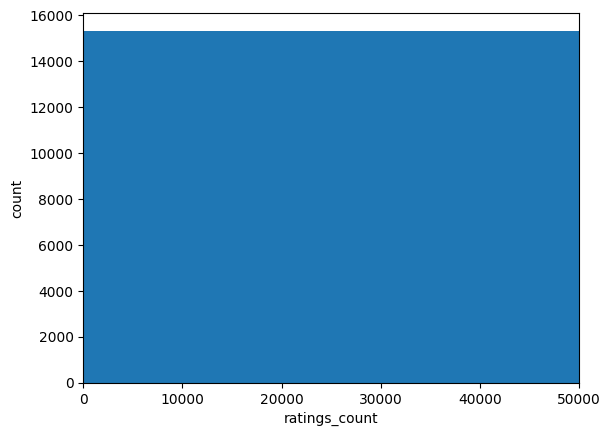

In [59]:
# Plot distribution of ratings_count from 0 to 50.000 with matplotlib
plt.hist(df.ratings_count, bins=20)
plt.xlabel('ratings_count')
plt.ylabel('count')
plt.xlim([0, 50000])
plt.show()

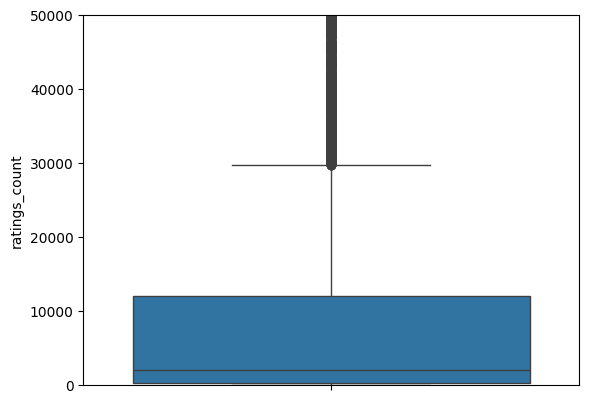

In [65]:
# Make a boxplot of ratings_count with a limit of 50000
sns.boxplot(df.ratings_count)
plt.ylim([0, 50000])
plt.show()